In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from core import utils
from synthetic_experiments import viz
from synthetic_experiments.config import SelectionExperimentConfig


In [2]:
cfg = SelectionExperimentConfig(
    n_judges=50,
    n_trials=2,
    resp_set_configs=[(100, 2, 3), (100, 3, 5), (100, 3, 7), (100, 4, 7), (100, 4, 8), (100, 4, 10), 
                     (100, 4, 12), (100, 5, 8), (100, 5, 12), (100, 5, 14), (100, 3, 3), (100, 4, 4), 
                     (100, 5, 5), (100, 6, 6)],
    taus=[0.3, 0.5, 0.7],
    n_ratings_per_item=[1, 3, 5,10, 20, 50, 100],
    judge_eps_min = 0.02,
    judge_eps_max = 0.5,
    constrain_judge = [True],
    rating_process_configs = [{
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 0,
            'judge_beta': 0, 
            'error_rate': 0,
            'skew': 0,
        }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2,
            'error_rate': 0,
            'skew': 0
        }, {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1,
            'error_rate': 0,
            'skew': 0
        }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2,
            'error_rate': 0.3,
            'skew': 0
        }, {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1,
            'error_rate': 0.3,
            'skew': 0
    }, {
            'human_order': 'decreasing',
            'judge_order': 'increasing', 
            'human_beta': 1,
            'judge_beta': 2,
            'error_rate': 0.3,
            'skew': 2
        }, {
            'human_order': 'increasing',
            'judge_order': 'decreasing', 
            'human_beta': 2,
            'judge_beta': 1,
            'error_rate': 0.3,
            'skew': 2
    }]
)

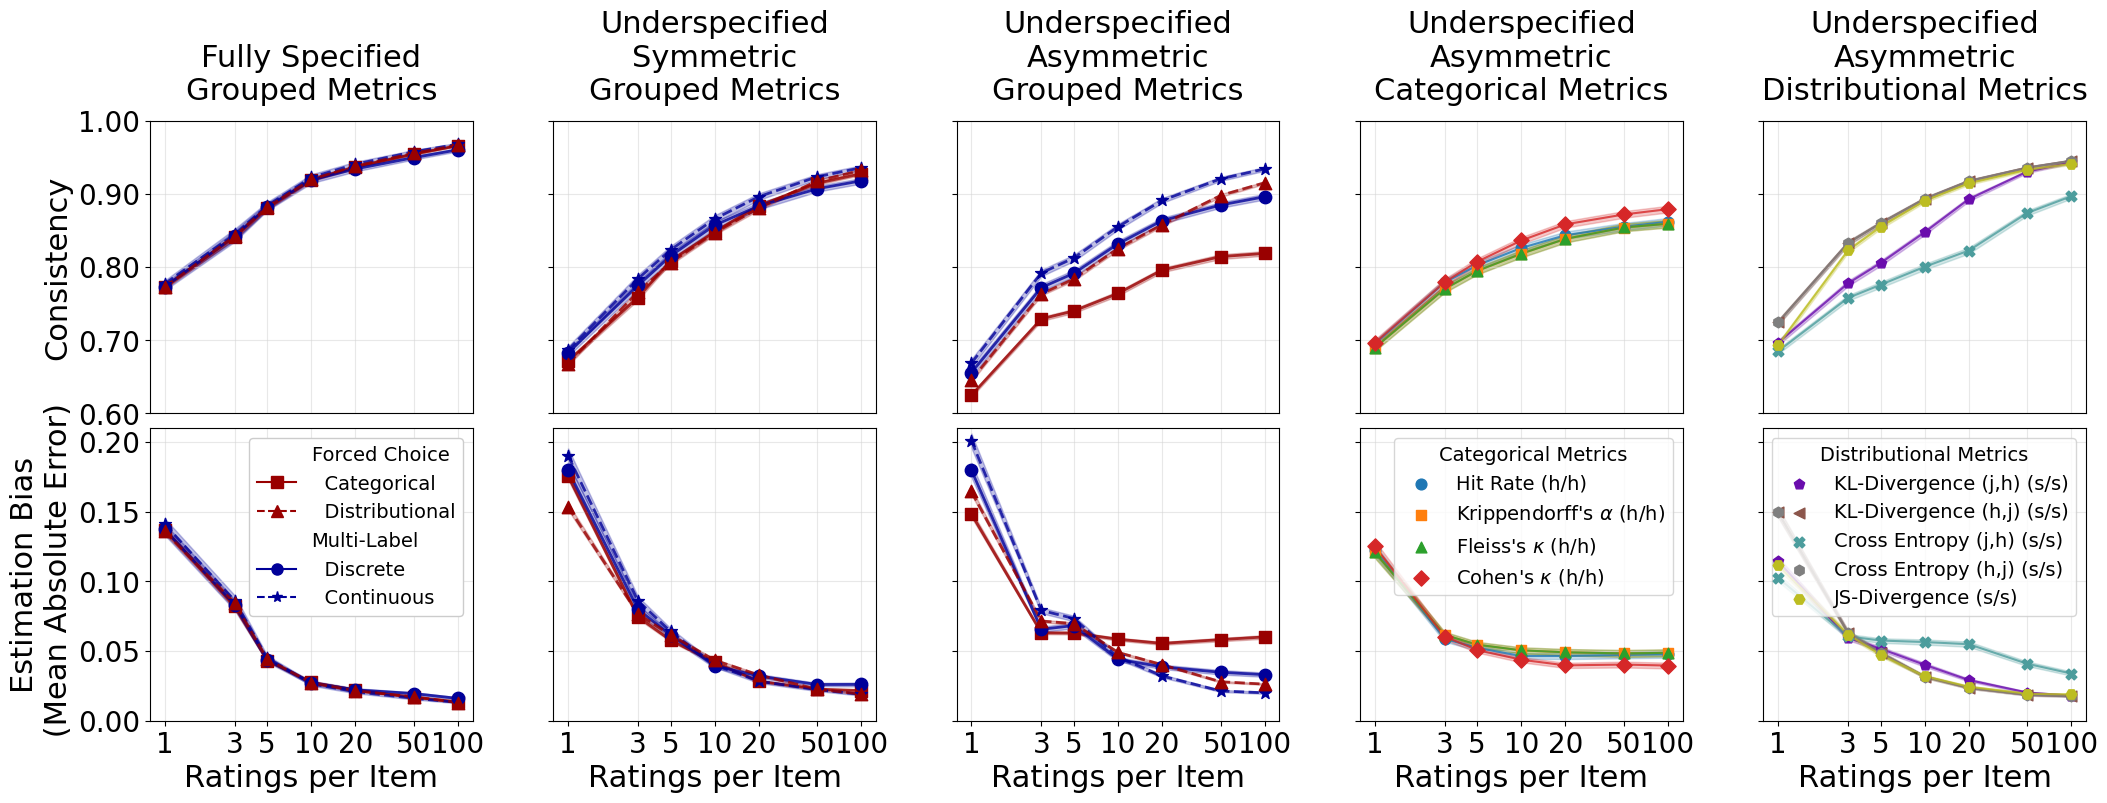

In [3]:
# Setting where we evaluate against the population rating distribution
df = pd.read_csv('../results/rating_budget.csv') # many configs, has same variance

labels = ['1',  '3', '5', '10', '20', '50','100']
mask = pd.Series(np.ones(df['target_measure'].shape[0])).astype(bool)

fig = viz.plot_selection_results_main(df, mask, labels, cfg)
plt.savefig('../figures/convergence_exp.pdf', dpi=400, bbox_inches='tight')


